In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

/Users/vincentbuchholz/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = load_breast_cancer(as_frame=True)


In [3]:
df = df.frame

In [4]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [5]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


## SGD CLASSIFIER

In [6]:
from sklearn.linear_model import SGDClassifier
import numpy as np
from sklearn.model_selection import train_test_split

Split the dataset into test and train

In [7]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

Train and fit the model

In [8]:
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train,y_train)

SGDClassifier(random_state=42)

### Messuring performance

#### Cross val scores

This trains the model on different subsets of the training data and gives the accurancy of predictions

In [9]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train, cv=5, scoring="accuracy")

array([0.85714286, 0.86813187, 0.84615385, 0.71428571, 0.74725275])

#### Confusion Matrix

In [10]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=5)

confusion_matrix(y_train, y_train_pred)

array([[138,  31],
       [ 57, 229]])

In [11]:
y_train.value_counts()

1    286
0    169
Name: target, dtype: int64

This tells us that the model has correctly classified 138 and falsy classifed 31 of cancer free patiens (Benign)
and correctly classifed 229 and falsy classifed 57 of the patients that have cancer (Malignant)

#### Precision and Recall

In [12]:
from sklearn.metrics import precision_score, recall_score

In [13]:
precision_score(y_train, y_train_pred)

0.8807692307692307

- This tells us that out of all the cases the model said was positive, it was 88% accurate

In [14]:
recall_score(y_train, y_train_pred)

0.8006993006993007

- This tells us that the model has correctly found 80% of the positive cases

#### F1 score

the f1 score summerizes the overall performance, and is the harmonic mean between precision and recall

In [15]:
from sklearn.metrics import f1_score

f1_score(y_train, y_train_pred)

0.8388278388278387

- Above 0.7 is generally seen as a good score, but this would not ne good enough for predicting if a patient has cancer

### ROC Curve

- the ROC curve shows the true positive rate with is the same as recall aginst the false positve rate

In [18]:
from sklearn.metrics import roc_curve

y_scores = cross_val_predict(sgd_clf, X_train, y_train, cv=3,
                             method="decision_function")

fpr, tpr, thresholds = roc_curve(y_train, y_scores)

In [19]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

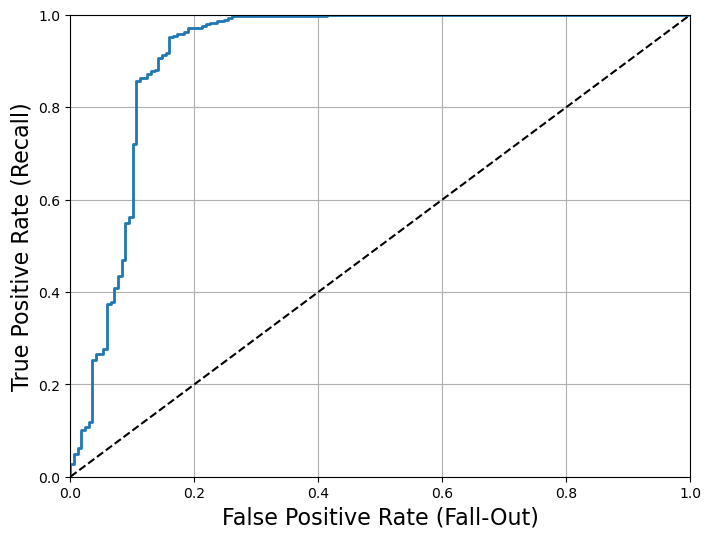

In [22]:
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.grid(True)


    
    
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

### Random Forrest Classifer

In [23]:
from sklearn.ensemble import RandomForestClassifier
rfc  = RandomForestClassifier(random_state=42)


In [24]:
from sklearn.model_selection import GridSearchCV

## Tuning hyperparamaters

hyperparamters are used to configure the model, there is no defined set that works for all, so to tune them, we need to try different combinations. To do so we use gridsearchCV.

In [25]:
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':np.arange(100,200,20),
              'max_features':[1,3,5,7],
           }

CV_rfc = GridSearchCV(estimator=rfc, param_grid=grid_space, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 10, None],
                         'max_features': [1, 3, 5, 7],
                         'n_estimators': array([100, 120, 140, 160, 180])})

In [26]:
CV_rfc.best_params_


{'max_depth': 10, 'max_features': 5, 'n_estimators': 180}

- these is the best combination between all the ranges
- We could have included a lot more, but due to the time it takes to run, we have chosen to stick with these 3

##### Max depth:
- The number of splits that each descision tree is allowed to make

##### n_estimators:
- the number of descision trees in the "forrest"

##### max_features: 
- the number of columns shown to each tree.


## Performance
#### cross validation

In [27]:
cross_val_score(CV_rfc, X_train, y_train, cv=5, scoring="accuracy")

array([0.96703297, 0.94505495, 0.97802198, 0.94505495, 0.92307692])

#### confiusion matrix

In [91]:
y_train_pred = cross_val_predict(CV_rfc, X_train, y_train, cv=5)

confusion_matrix(y_train, y_train_pred)

array([[154,  15],
       [  7, 279]])

In [50]:
y_test_pred = cross_val_predict(CV_rfc, X_test, y_test, cv=5)
confusion_matrix(y_test, y_test_pred)

array([[40,  3],
       [ 2, 69]])

#### Precision and recall

In [40]:
print(f'Precision: {precision_score(y_train, y_train_pred)}')
print(f'Recall: {recall_score(y_train, y_train_pred)}')
print(f'F1 score {f1_score(y_train, y_train_pred)}')

Precision: 0.9324324324324325
Recall: 0.965034965034965
F1 score 0.9484536082474226


In [51]:
print(f'Precision: {precision_score(y_test, y_test_pred)}')
print(f'Recall: {recall_score(y_test, y_test_pred)}')
print(f'F1 score {f1_score(y_test, y_test_pred)}')

Precision: 0.9583333333333334
Recall: 0.971830985915493
F1 score 0.965034965034965


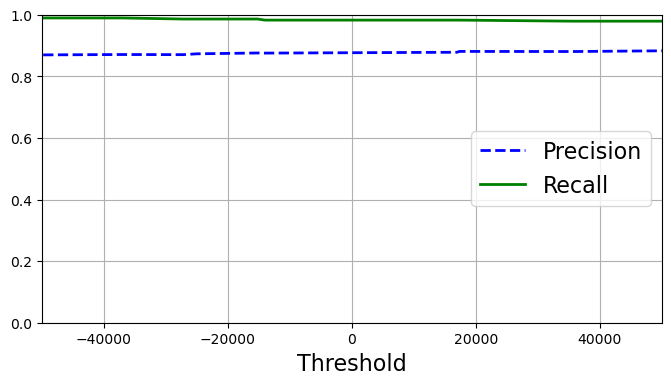

In [52]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.show()

### ROC curve

In [41]:
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

In [42]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

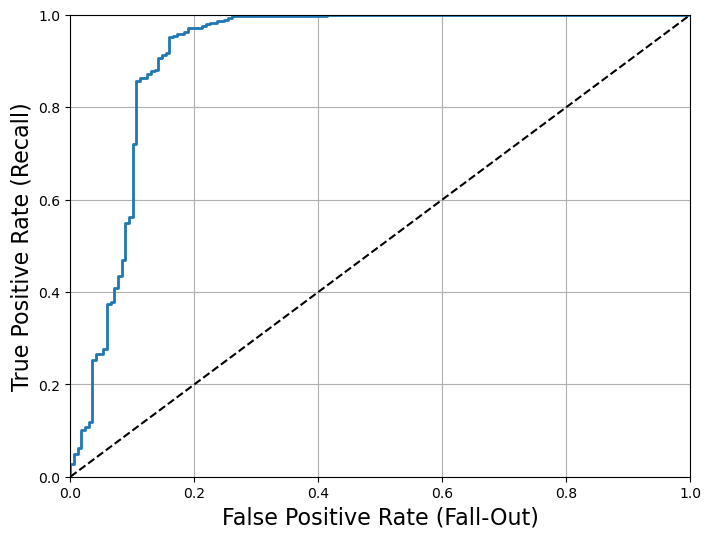

In [43]:
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)

plt.show()

## Naive Bayes

In [44]:
from sklearn.naive_bayes import GaussianNB

In [45]:
naiveB = GaussianNB()

naiveB.fit(X_train, y_train);

### Performance

##### Cross Val Score

In [46]:
cross_val_score(naiveB, X_train, y_train, cv=5, scoring="accuracy")

array([0.91208791, 0.94505495, 0.94505495, 0.94505495, 0.92307692])

##### Confusion Matrix

In [47]:
y_train_pred = cross_val_predict(naiveB, X_train, y_train, cv=5)

confusion_matrix(y_train, y_train_pred)

array([[149,  20],
       [ 10, 276]])

### Precision/Recall

In [48]:
print(f'Precision: {precision_score(y_train, y_train_pred)}')
print(f'Recall: {recall_score(y_train, y_train_pred)}')
print(f'F1 score {f1_score(y_train, y_train_pred)}')

Precision: 0.9324324324324325
Recall: 0.965034965034965
F1 score 0.9484536082474226


### ROC curve

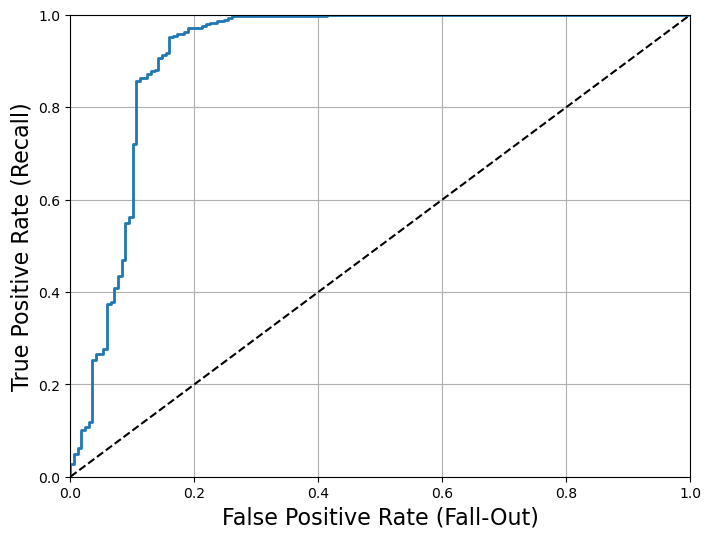

In [49]:
fpr, tpr, thresholds = roc_curve(y_train, y_scores)
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)

plt.show()

## Saving the models

In [57]:
import pickle

In [58]:
# sgd
with open("sgd.pkl", 'wb') as file:  
    pickle.dump(sgd_clf, file)
    
#rfc
with open("rfc.pkl", 'wb') as file:  
    pickle.dump(CV_rfc, file)
    
#Naive bayes
with open("nb.pkl", 'wb') as file:  
    pickle.dump(naiveB, file)

In [60]:
X.to_csv("cancer.csv",sep=",",index=False)